### 12- Is there any periodicity for each store’s time series in August?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
train_df = pd.read_csv('/home/nnemati/forcasting_time_series/kaggle_chalenge/sale_forcasting_chalenge/data/raw/train.csv')

In [5]:
type(train_df)

pandas.core.frame.DataFrame

In [6]:
train_df['date'] = pd.to_datetime(train_df['date'], format="%Y-%m-%d")

In [7]:
type(train_df)

pandas.core.frame.DataFrame

In [8]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [9]:
train_df['agg_sales'] = train_df[['date', 'store_nbr', 'sales']].groupby(['date', 'store_nbr']).transform('sum')

In [10]:
train_df.tail()

,id,date,store_nbr,family,sales,onpromotion,agg_sales
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,18636.477
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,18636.477
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,18636.477
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,18636.477
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0,18636.477


In [11]:
stores = train_df['store_nbr'].drop_duplicates().values

In [12]:
stores

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [13]:
august_sale = train_df[(train_df['date'].dt.month == 8) & (train_df['date'].dt.year == 2016)]

In [14]:
august_sale.tail(30)

,id,date,store_nbr,family,sales,onpromotion,agg_sales
2380722,2380722,2016-08-31,9,BEVERAGES,3156.000,27,15667.643
2380723,2380723,2016-08-31,9,BOOKS,0.000,0,15667.643
2380724,2380724,2016-08-31,9,BREAD/BAKERY,574.000,10,15667.643
2380725,2380725,2016-08-31,9,CELEBRATION,9.000,0,15667.643
2380726,2380726,2016-08-31,9,CLEANING,1623.000,21,15667.643
2380727,2380727,2016-08-31,9,DAIRY,837.000,129,15667.643
2380728,2380728,2016-08-31,9,DELI,579.067,8,15667.643
2380729,2380729,2016-08-31,9,EGGS,71.000,0,15667.643
2380730,2380730,2016-08-31,9,FROZEN FOODS,71.000,0,15667.643
2380731,2380731,2016-08-31,9,GROCERY I,5684.286,48,15667.643


store_number:  1


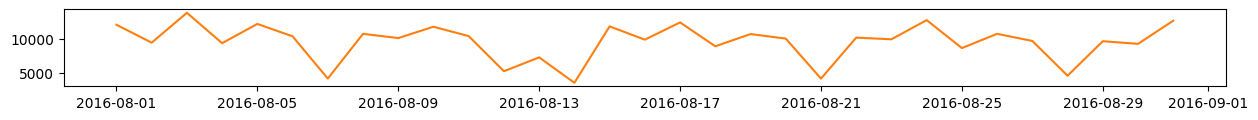

store_number:  10


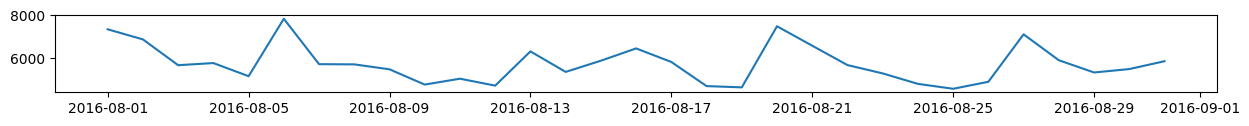

store_number:  11


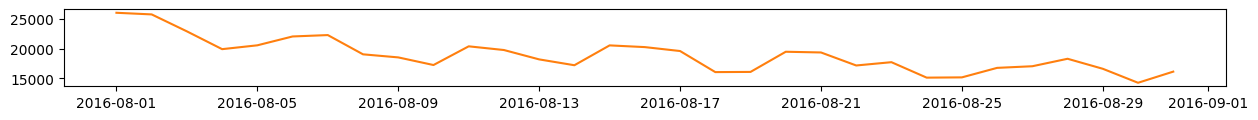

store_number:  12


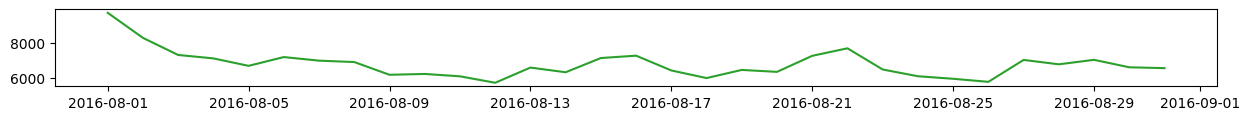

store_number:  13


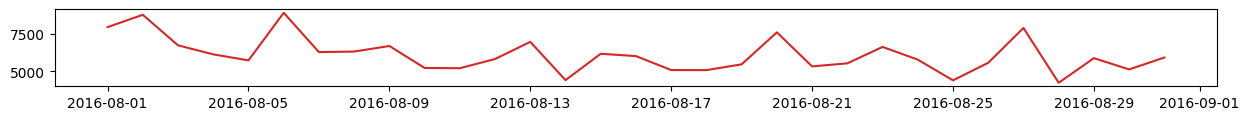

store_number:  14


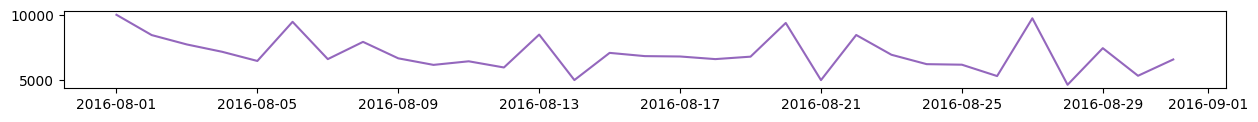

store_number:  15


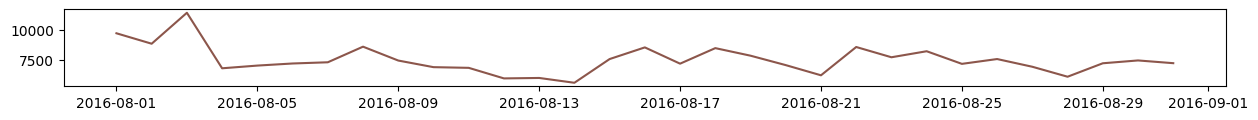

store_number:  16


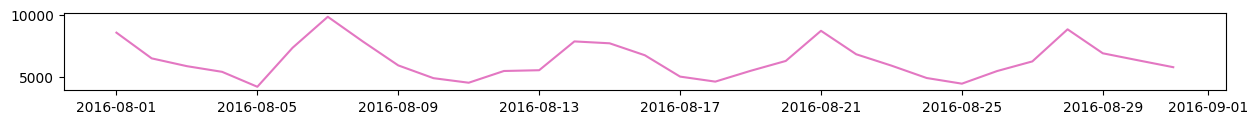

store_number:  17


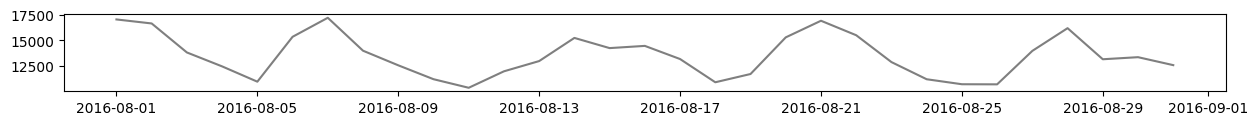

store_number:  18


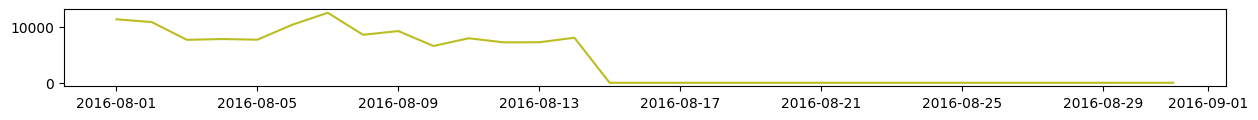

store_number:  19


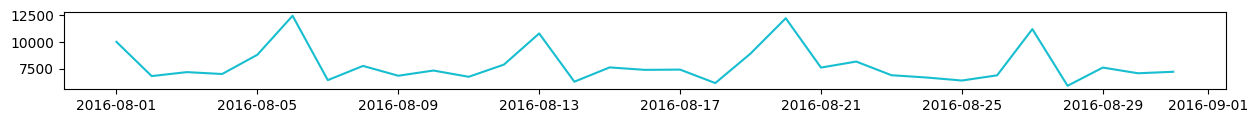

store_number:  2


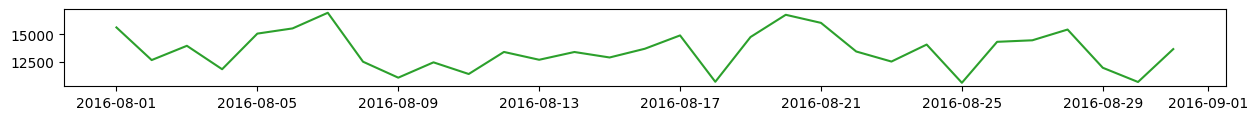

store_number:  20


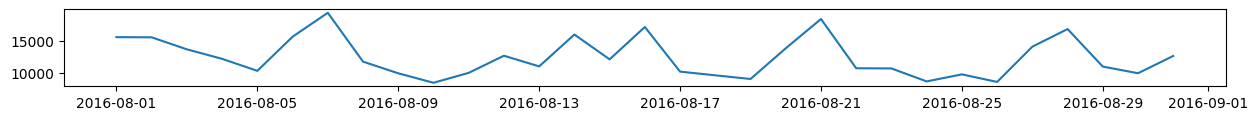

store_number:  21


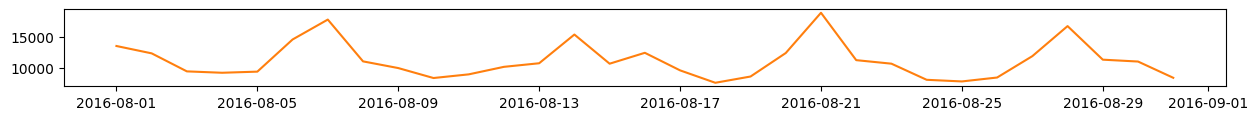

store_number:  22


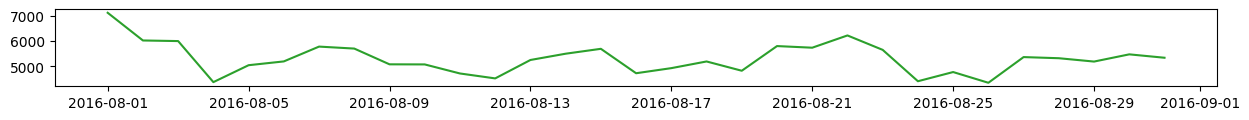

store_number:  23


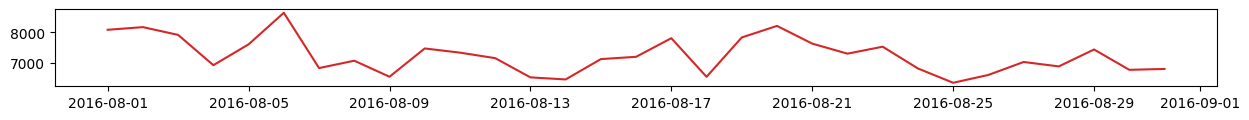

store_number:  24


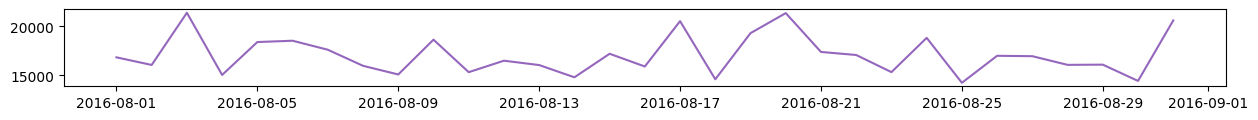

store_number:  25


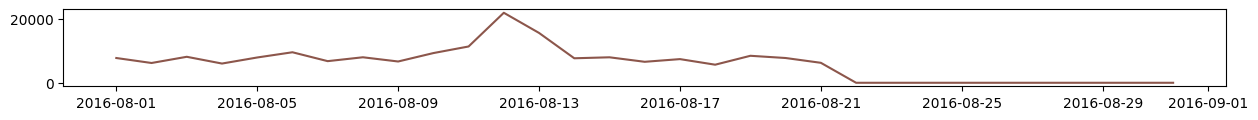

store_number:  26


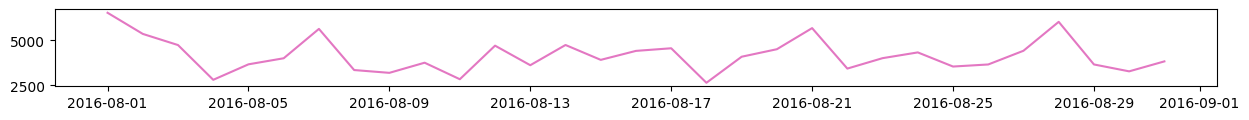

store_number:  27


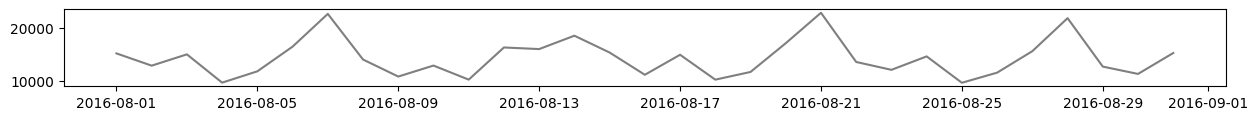

store_number:  28


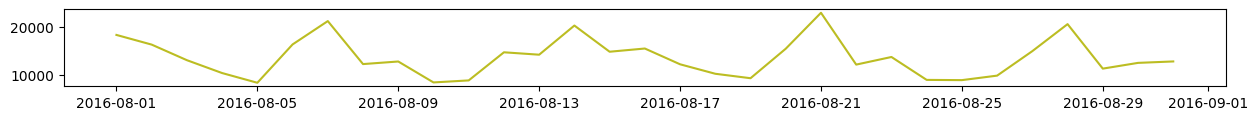

store_number:  29


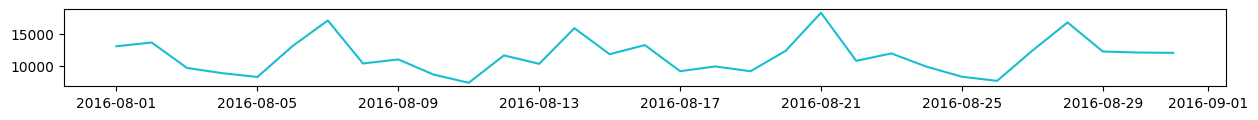

store_number:  3


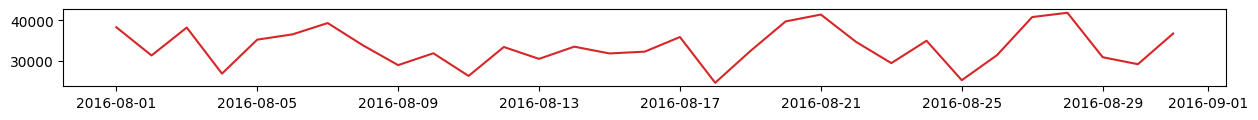

store_number:  30


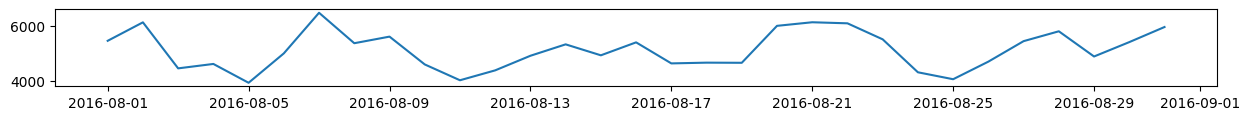

store_number:  31


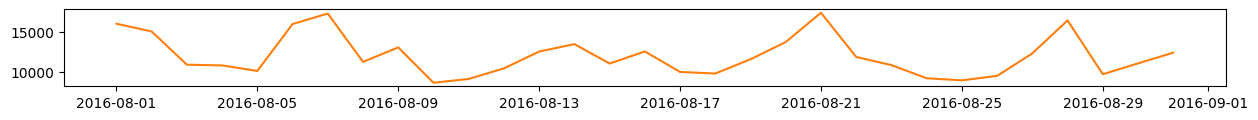

store_number:  32


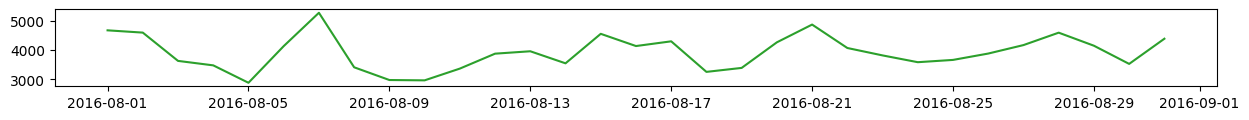

store_number:  33


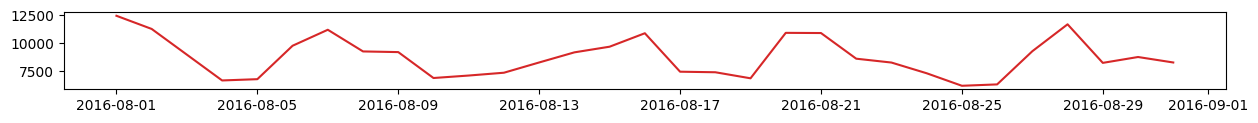

store_number:  34


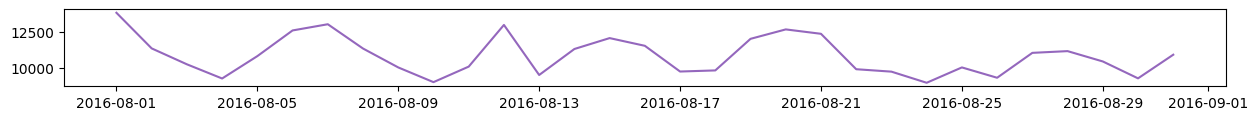

store_number:  35


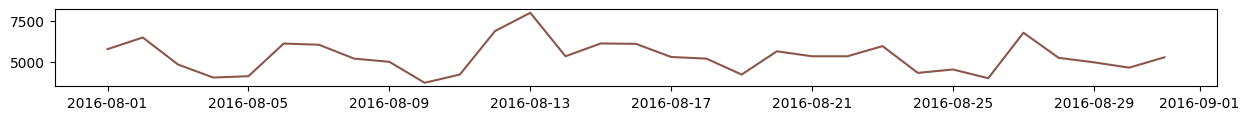

store_number:  36


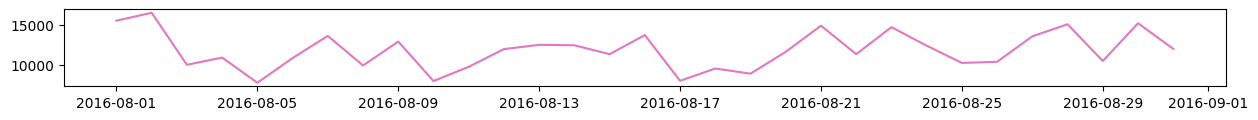

store_number:  37


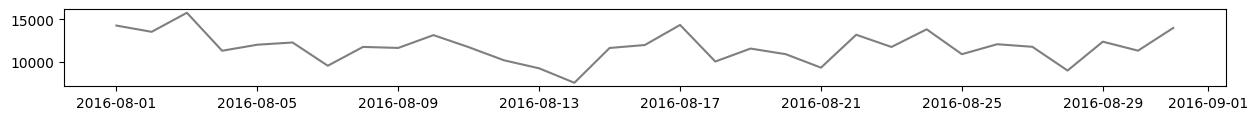

store_number:  38


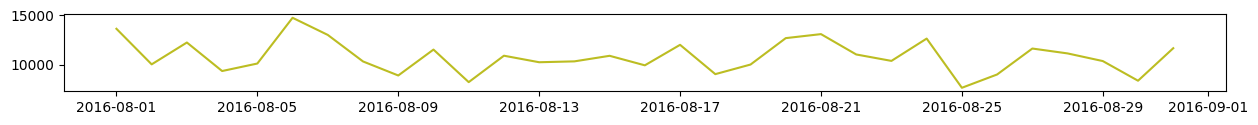

store_number:  39


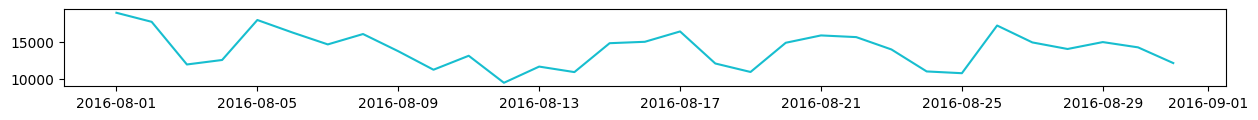

store_number:  4


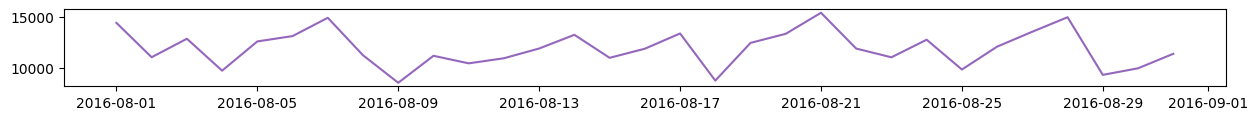

store_number:  40


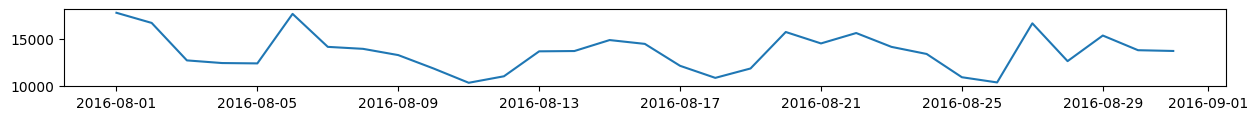

store_number:  41


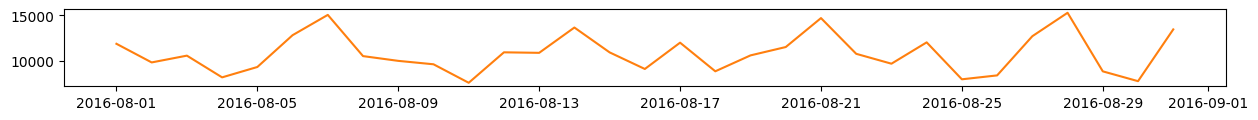

store_number:  42


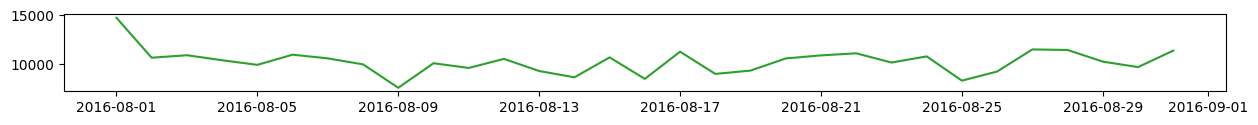

store_number:  43


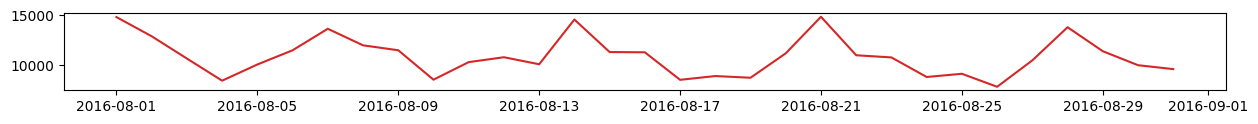

store_number:  44


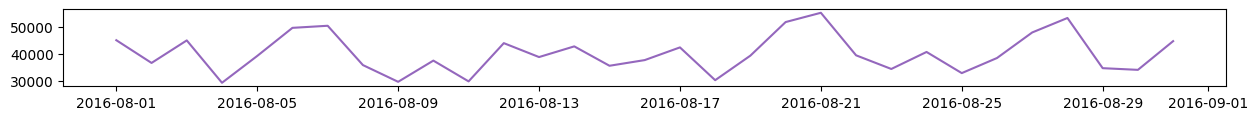

store_number:  45


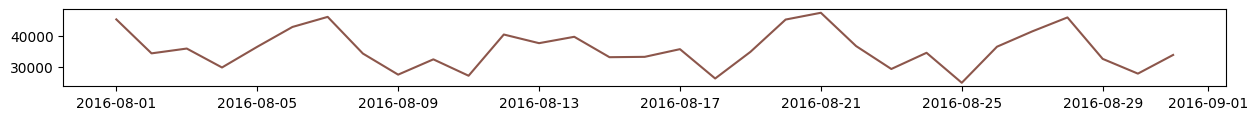

store_number:  46


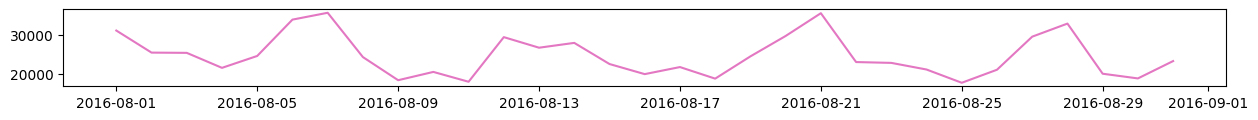

store_number:  47


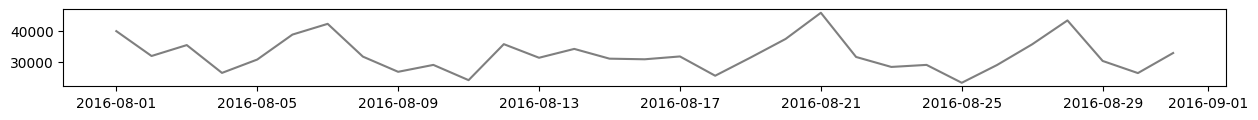

store_number:  48


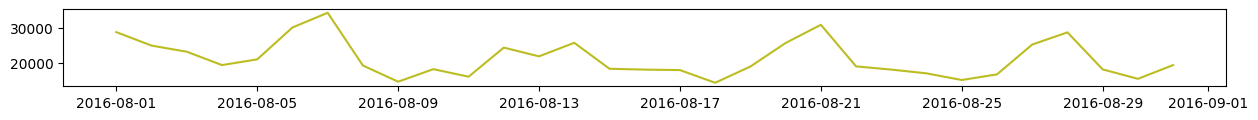

store_number:  49


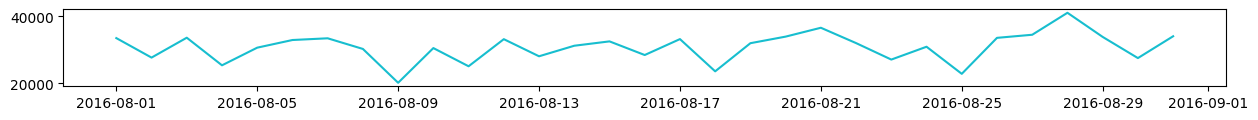

store_number:  5


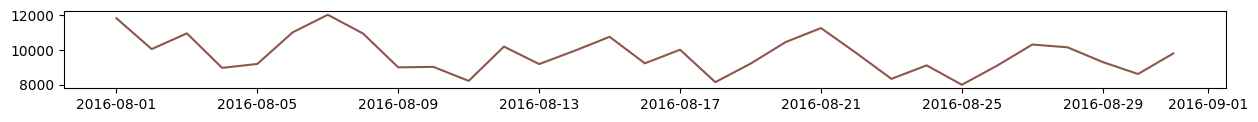

store_number:  50


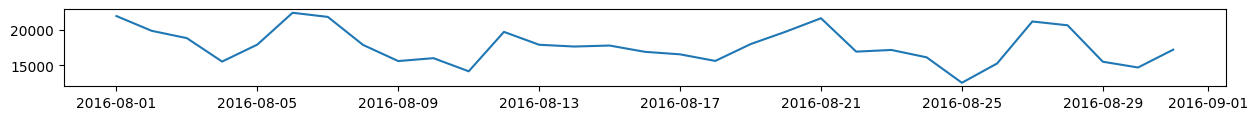

store_number:  51


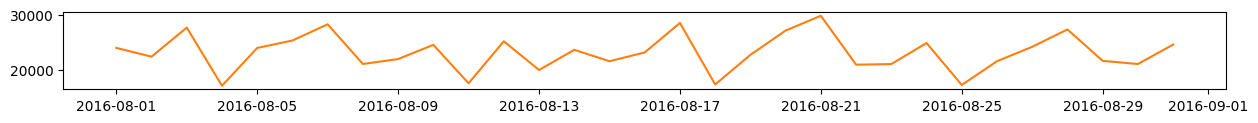

store_number:  52


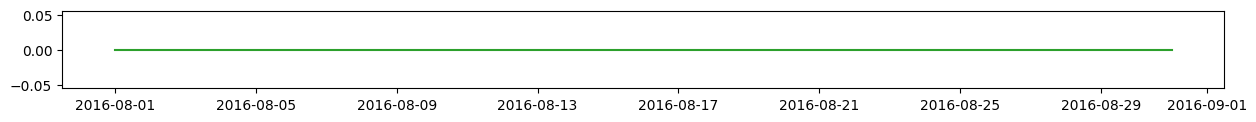

store_number:  53


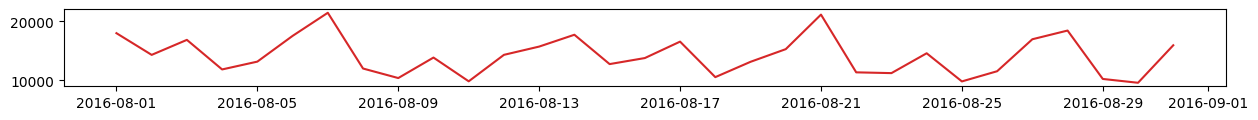

store_number:  54


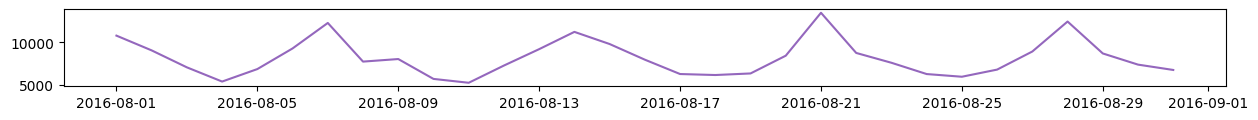

store_number:  6


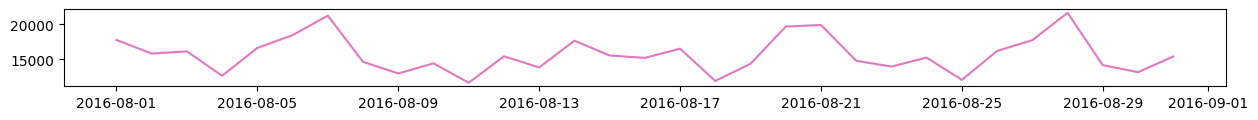

store_number:  7


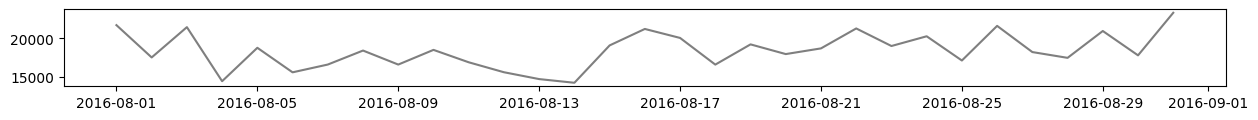

store_number:  8


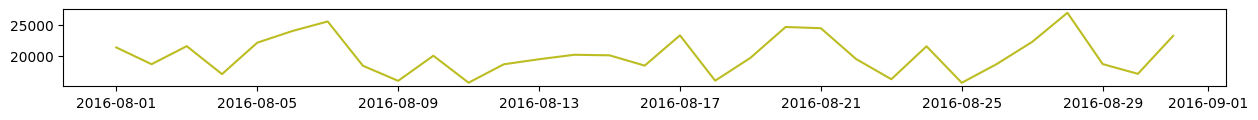

store_number:  9


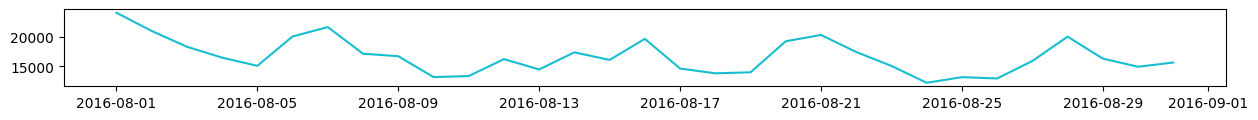

In [15]:
for store in stores:
    tmp_aug = august_sale[august_sale['store_nbr']==store][['date','agg_sales']].drop_duplicates()
    print('store_number: ', store)
    plt.figure(figsize=(15, 1))
    plt.plot(tmp_aug['date'], tmp_aug['agg_sales'], 'C'+str(store))
    plt.show()

<Figure size 1500x100 with 0 Axes>

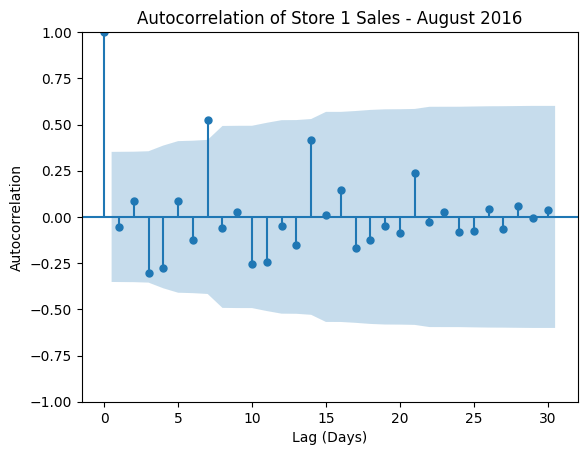

<Figure size 1500x100 with 0 Axes>

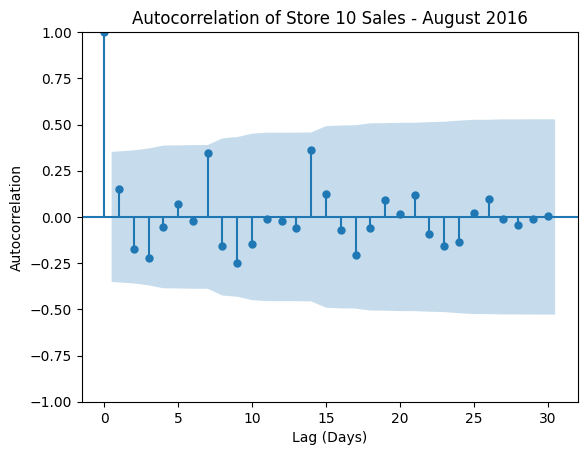

<Figure size 1500x100 with 0 Axes>

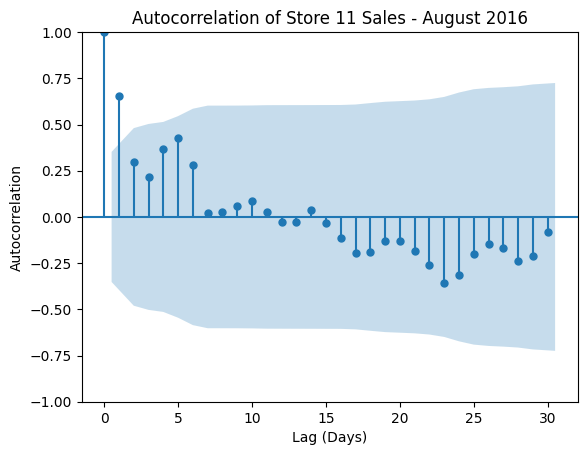

<Figure size 1500x100 with 0 Axes>

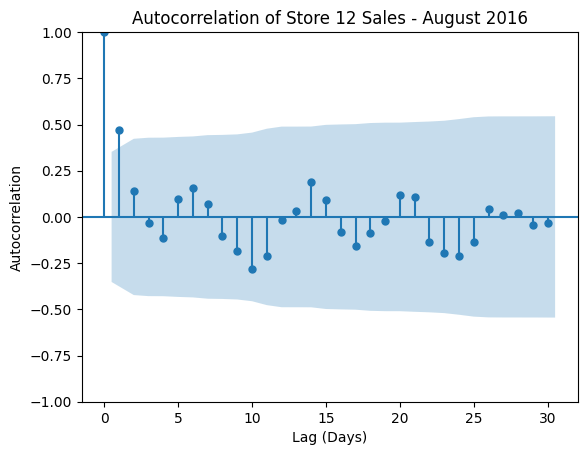

<Figure size 1500x100 with 0 Axes>

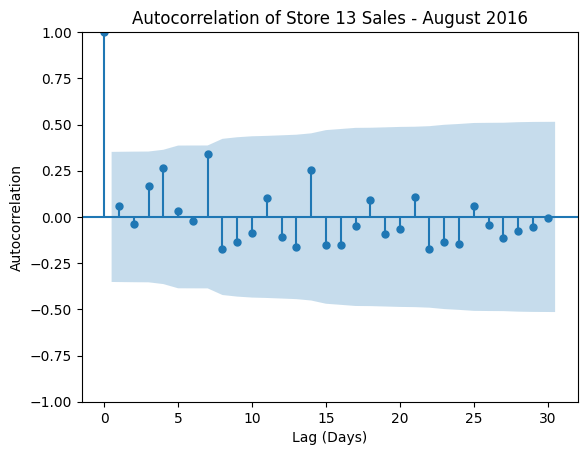

<Figure size 1500x100 with 0 Axes>

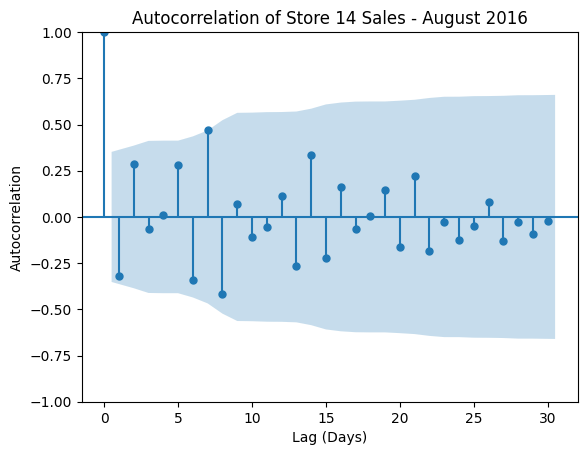

<Figure size 1500x100 with 0 Axes>

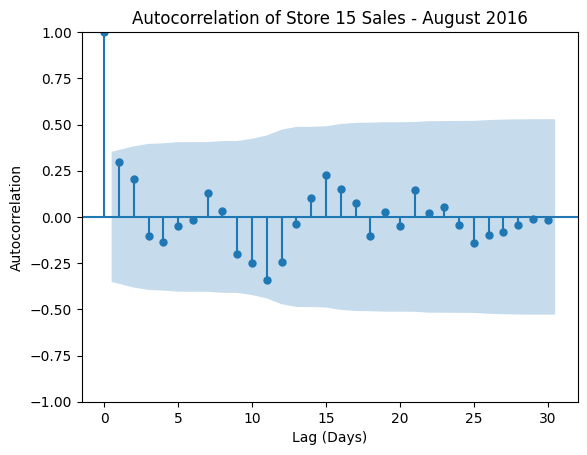

<Figure size 1500x100 with 0 Axes>

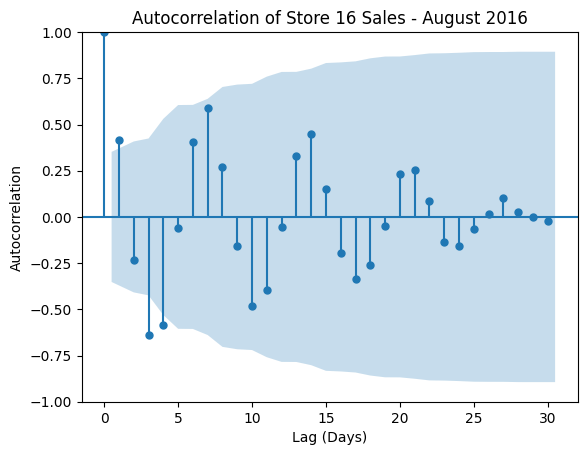

<Figure size 1500x100 with 0 Axes>

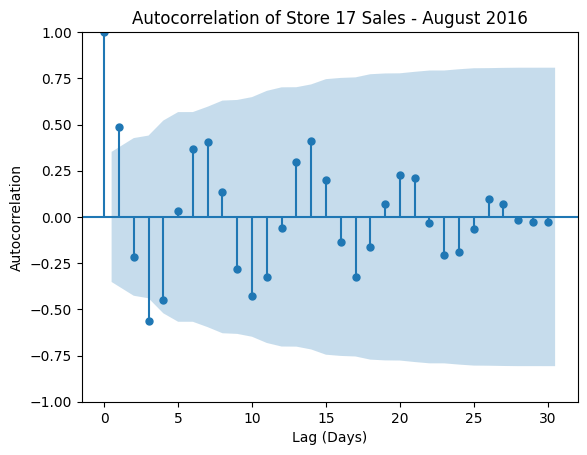

<Figure size 1500x100 with 0 Axes>

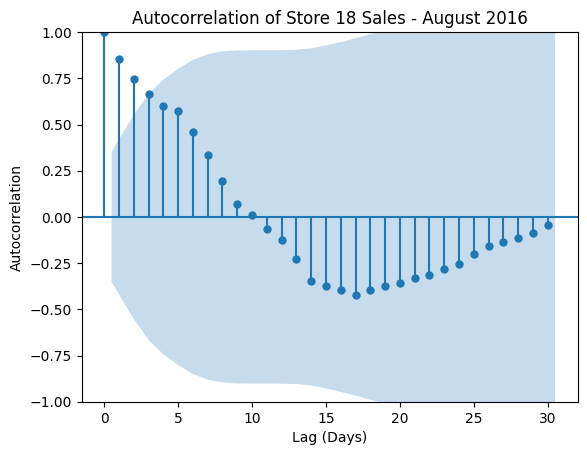

<Figure size 1500x100 with 0 Axes>

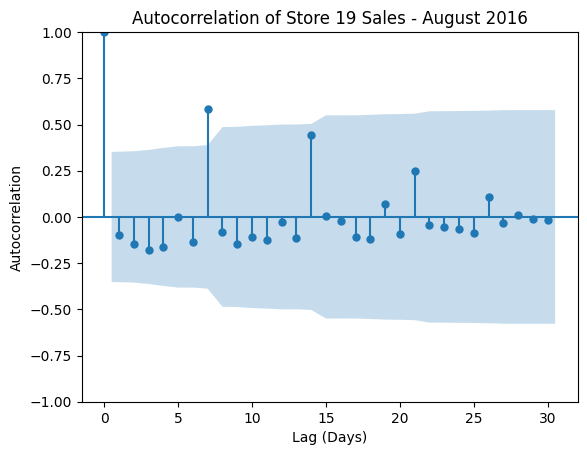

<Figure size 1500x100 with 0 Axes>

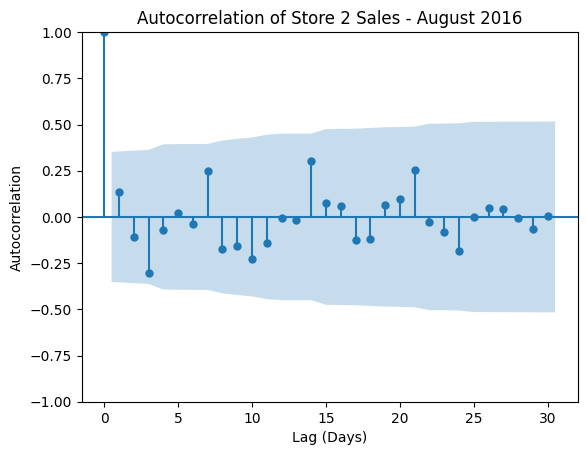

<Figure size 1500x100 with 0 Axes>

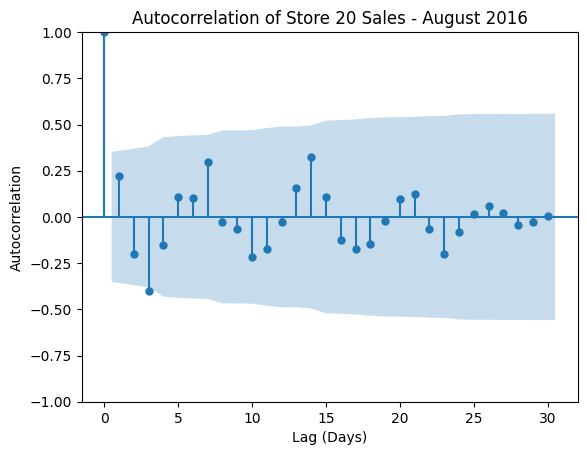

<Figure size 1500x100 with 0 Axes>

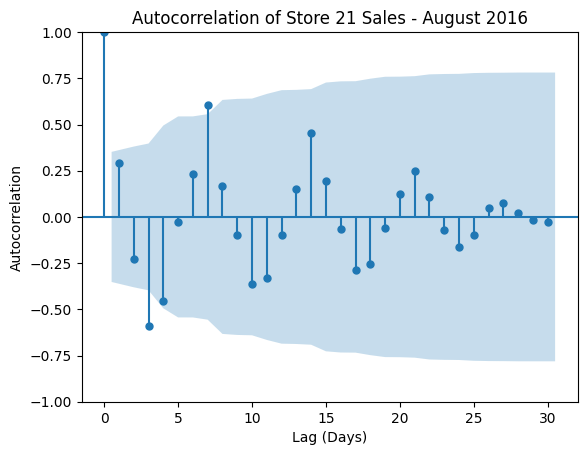

<Figure size 1500x100 with 0 Axes>

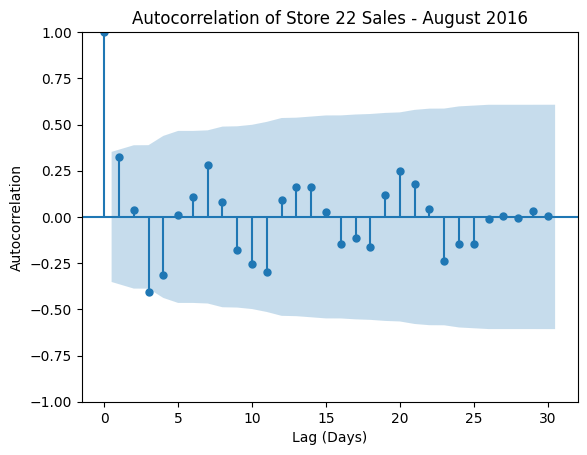

<Figure size 1500x100 with 0 Axes>

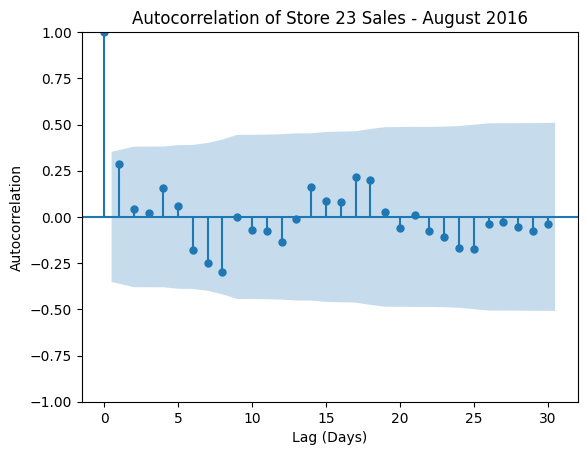

<Figure size 1500x100 with 0 Axes>

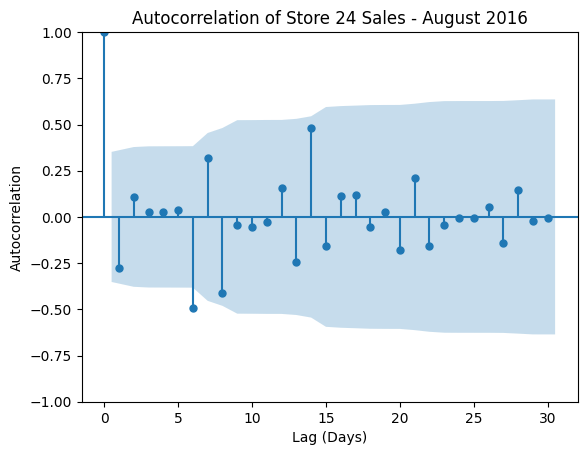

<Figure size 1500x100 with 0 Axes>

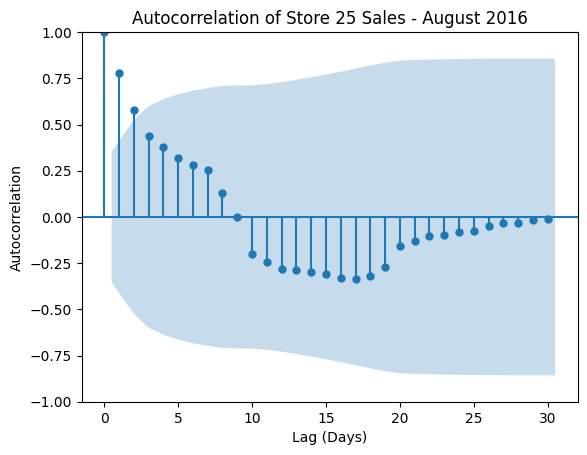

<Figure size 1500x100 with 0 Axes>

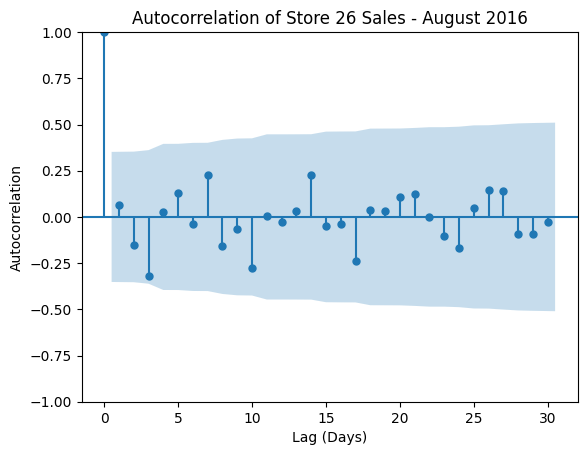

<Figure size 1500x100 with 0 Axes>

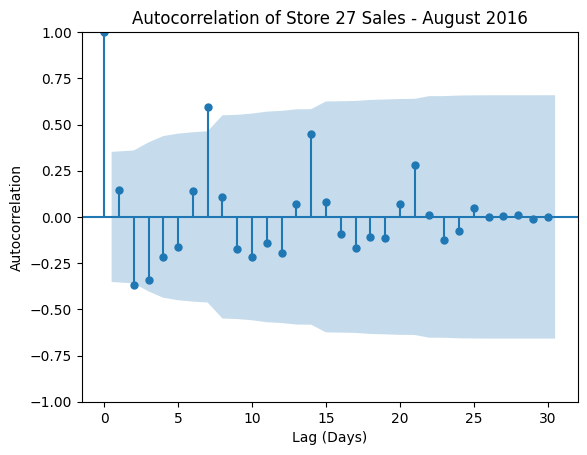

<Figure size 1500x100 with 0 Axes>

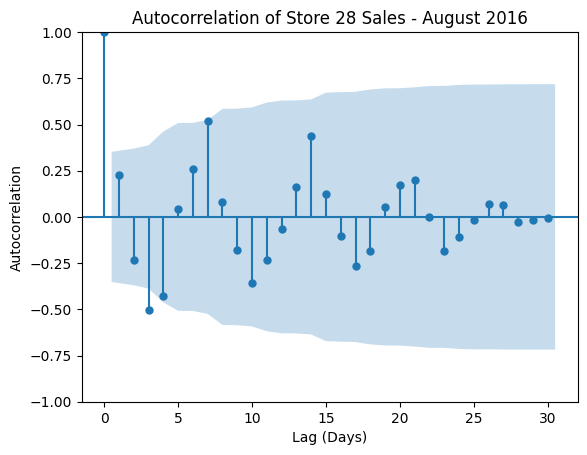

<Figure size 1500x100 with 0 Axes>

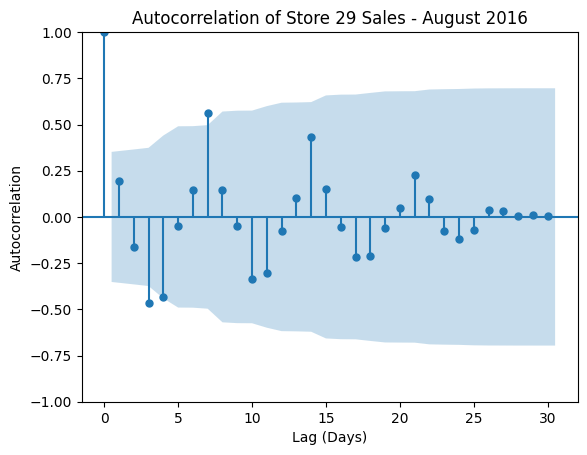

<Figure size 1500x100 with 0 Axes>

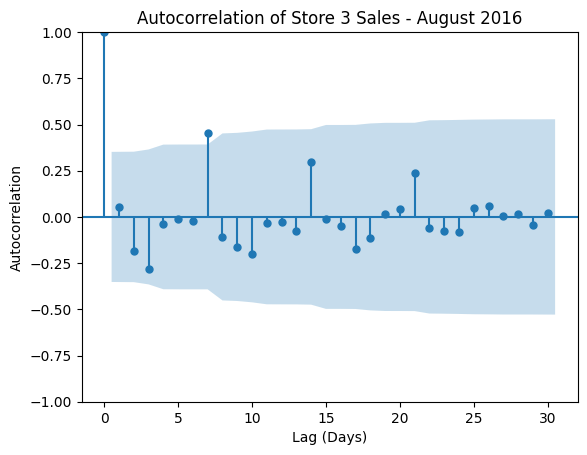

<Figure size 1500x100 with 0 Axes>

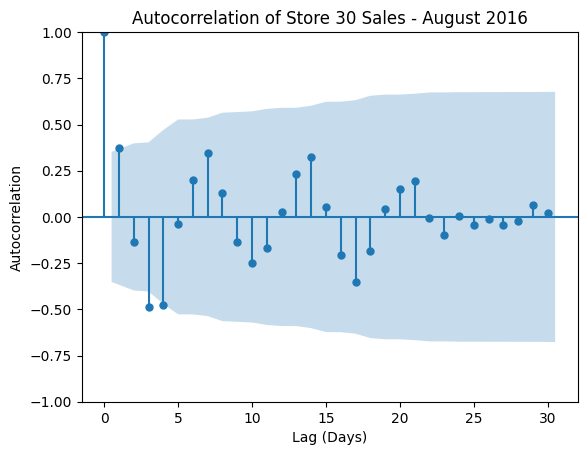

<Figure size 1500x100 with 0 Axes>

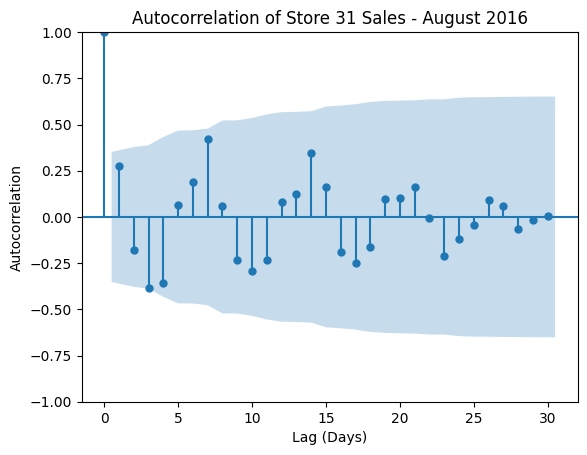

<Figure size 1500x100 with 0 Axes>

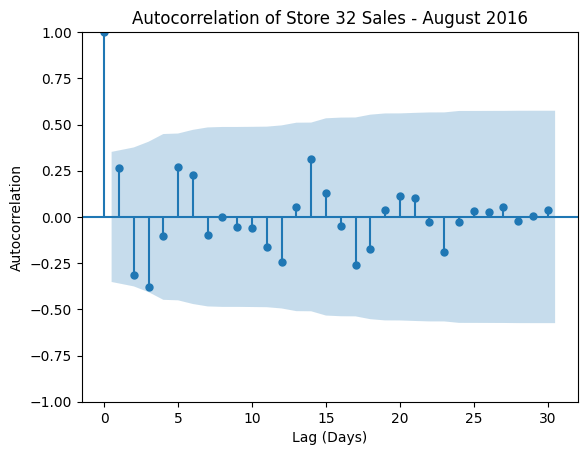

<Figure size 1500x100 with 0 Axes>

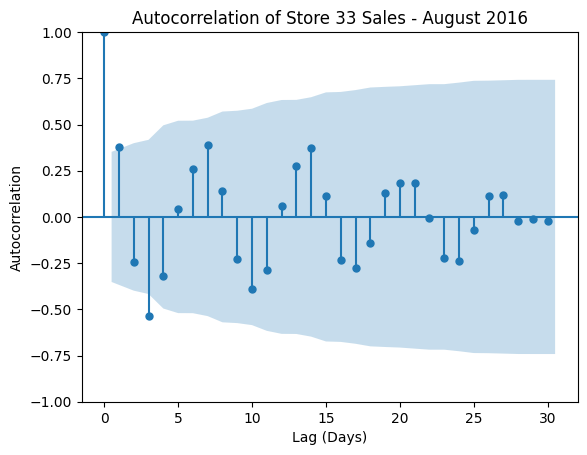

<Figure size 1500x100 with 0 Axes>

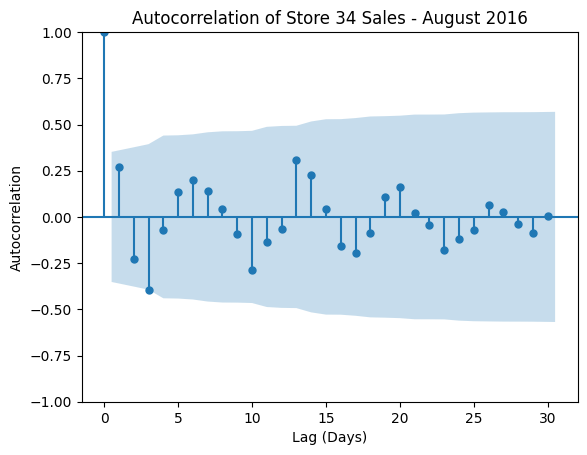

<Figure size 1500x100 with 0 Axes>

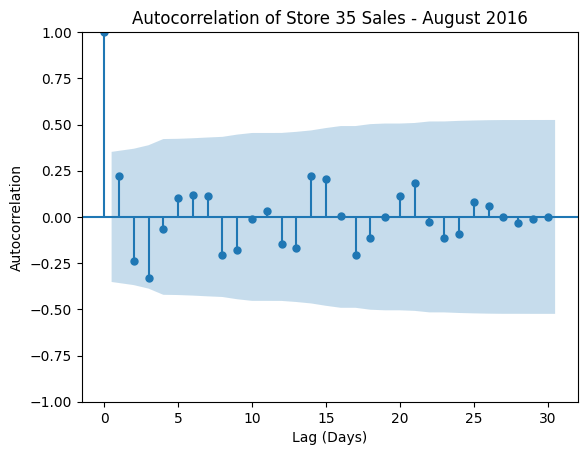

<Figure size 1500x100 with 0 Axes>

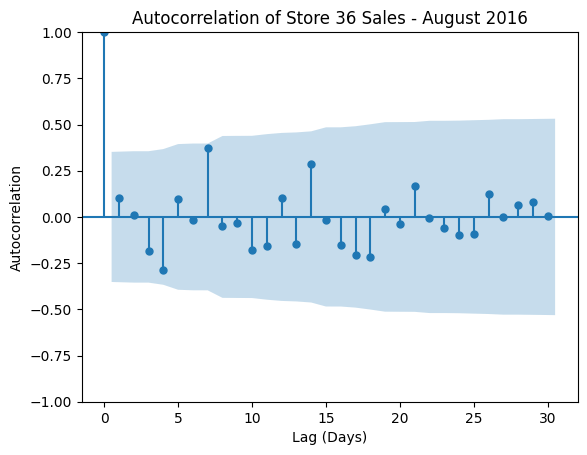

<Figure size 1500x100 with 0 Axes>

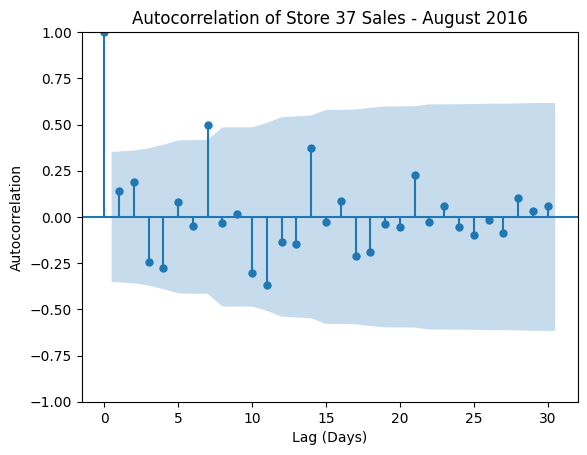

<Figure size 1500x100 with 0 Axes>

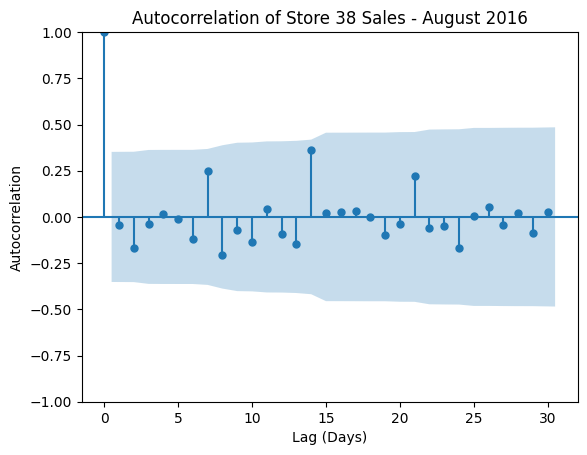

<Figure size 1500x100 with 0 Axes>

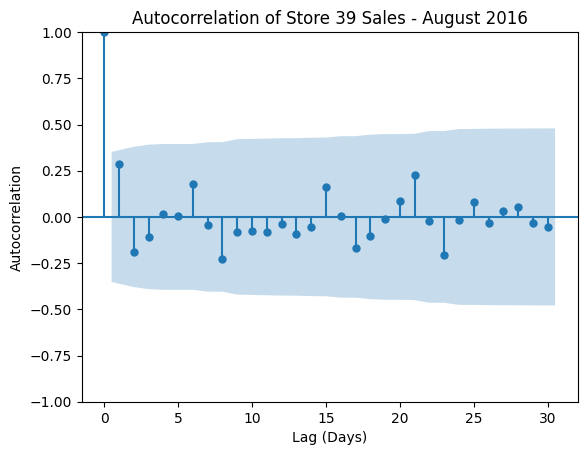

<Figure size 1500x100 with 0 Axes>

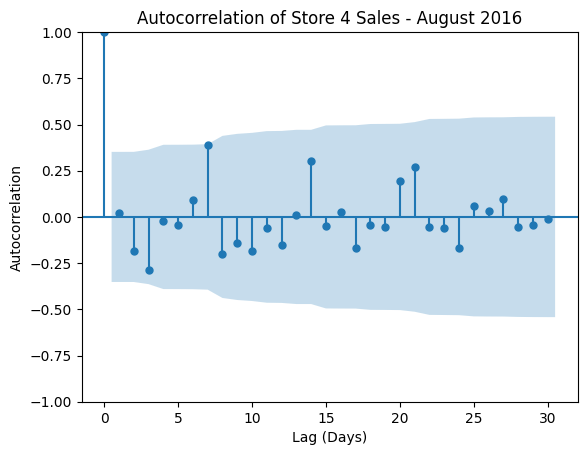

<Figure size 1500x100 with 0 Axes>

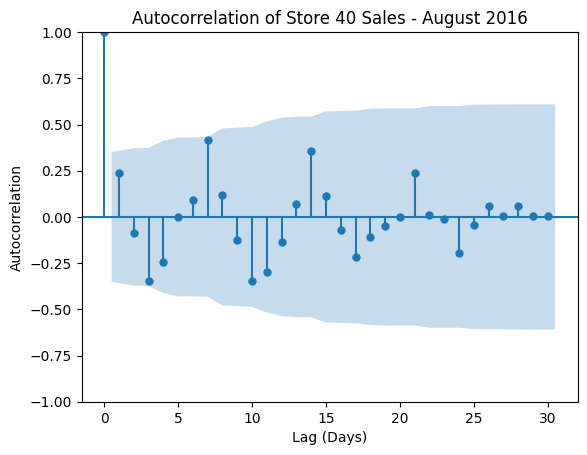

<Figure size 1500x100 with 0 Axes>

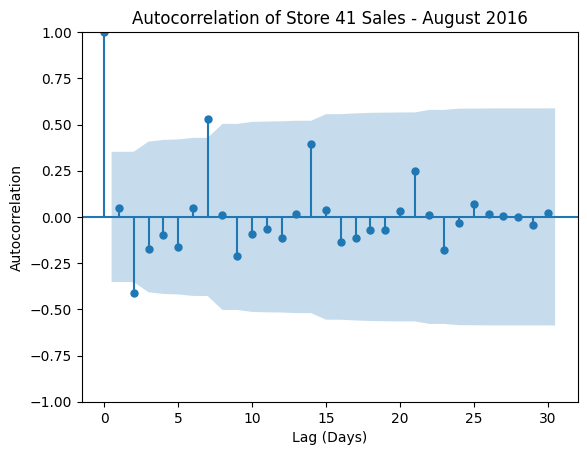

<Figure size 1500x100 with 0 Axes>

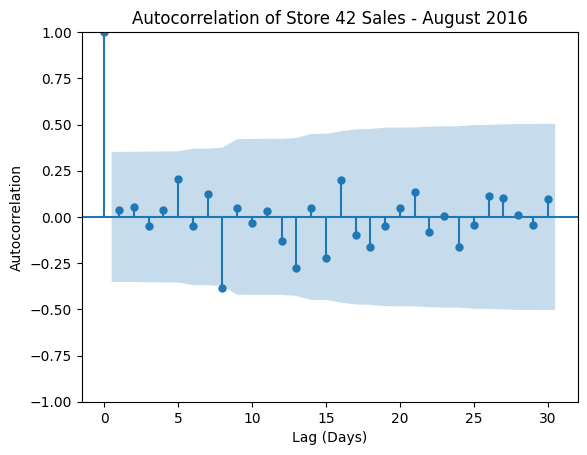

<Figure size 1500x100 with 0 Axes>

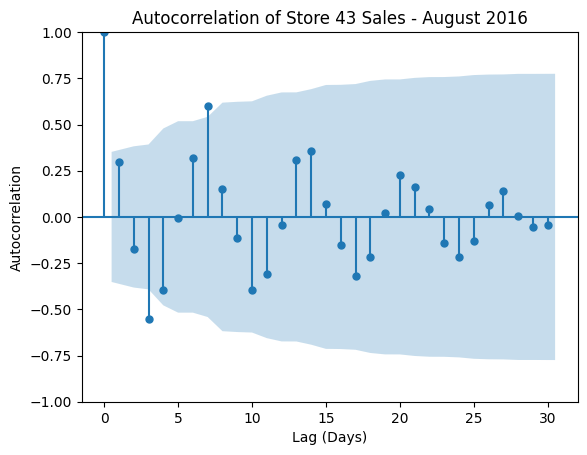

<Figure size 1500x100 with 0 Axes>

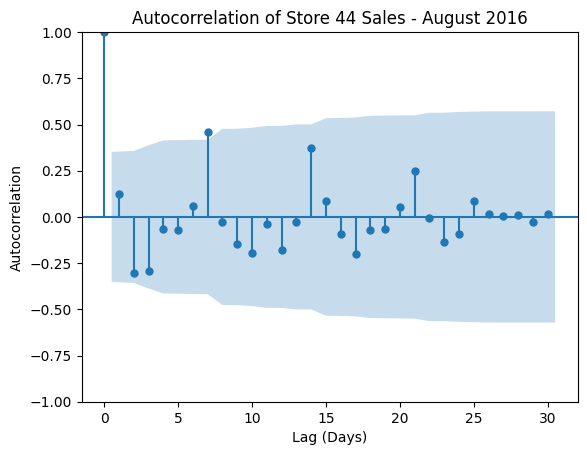

<Figure size 1500x100 with 0 Axes>

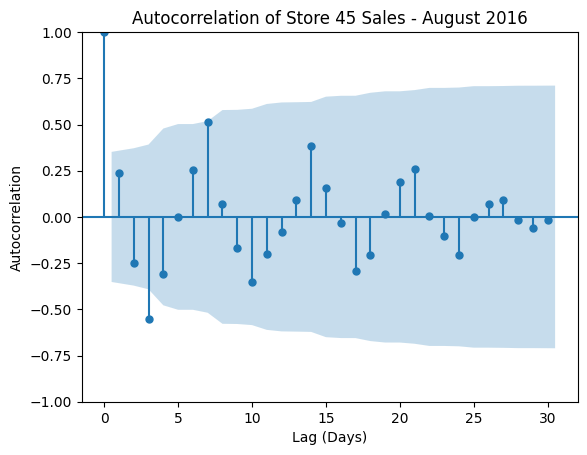

<Figure size 1500x100 with 0 Axes>

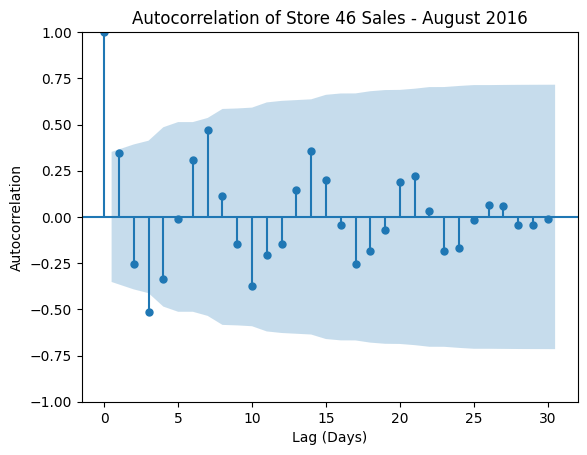

<Figure size 1500x100 with 0 Axes>

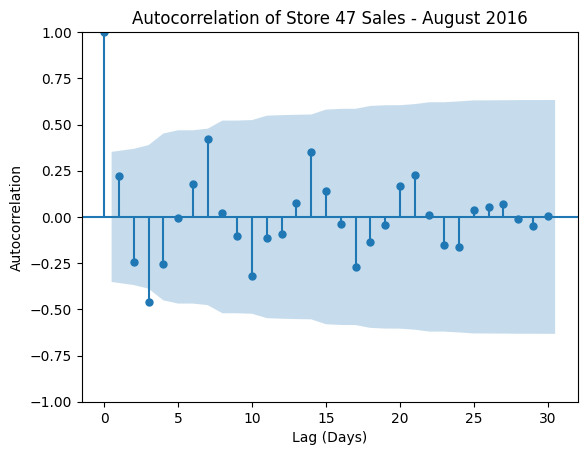

<Figure size 1500x100 with 0 Axes>

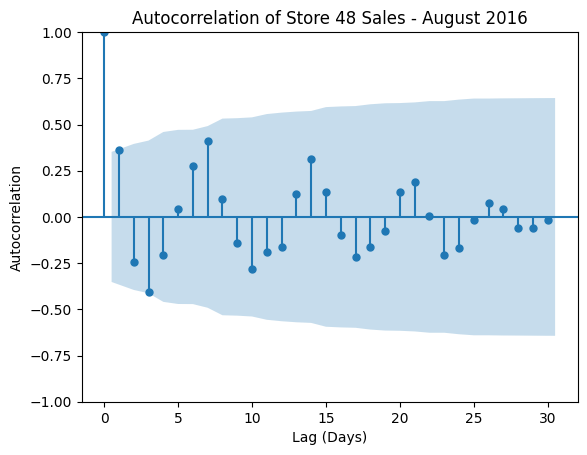

<Figure size 1500x100 with 0 Axes>

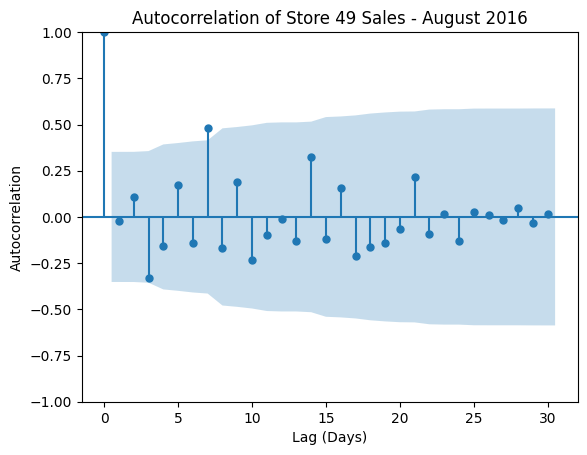

<Figure size 1500x100 with 0 Axes>

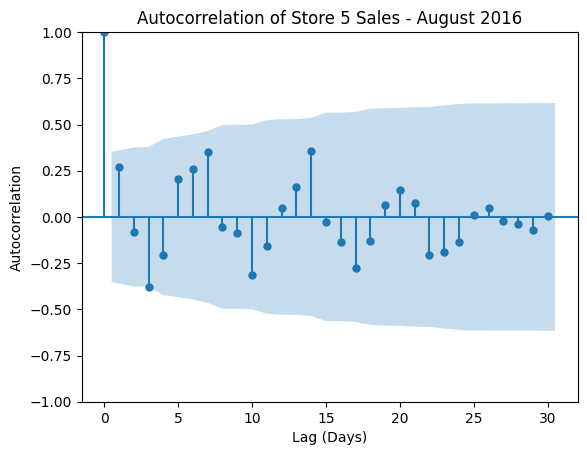

<Figure size 1500x100 with 0 Axes>

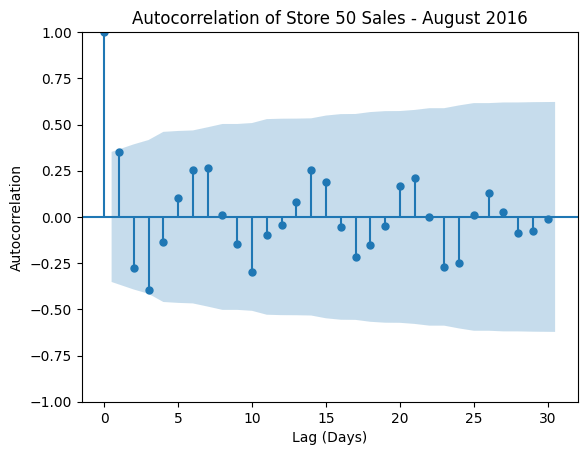

<Figure size 1500x100 with 0 Axes>

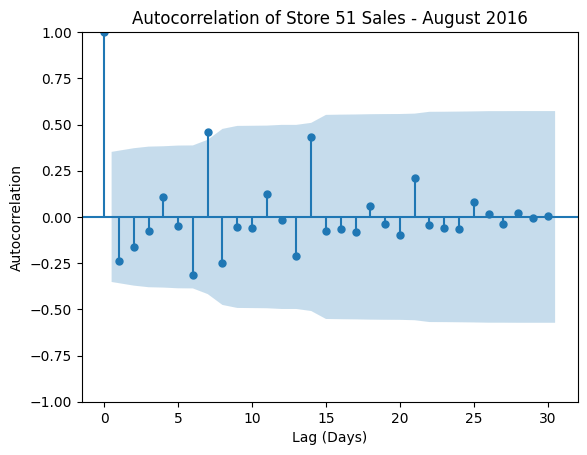

/home/nnemati/python_envs/sales_env/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


<Figure size 1500x100 with 0 Axes>

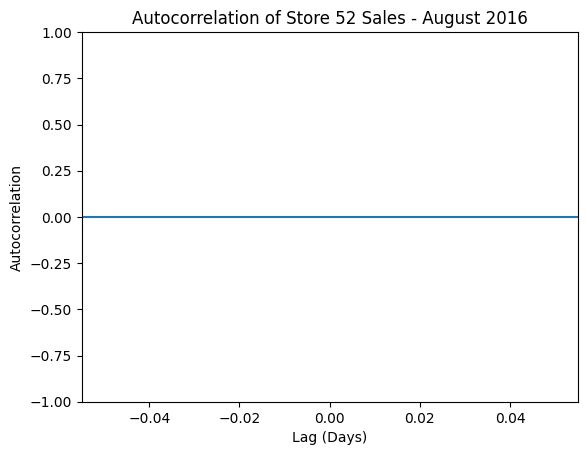

<Figure size 1500x100 with 0 Axes>

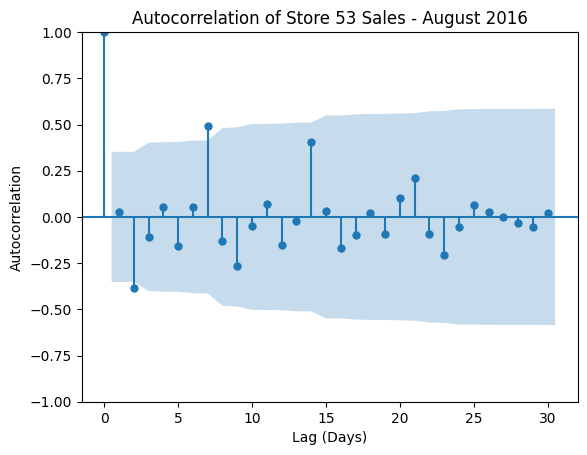

<Figure size 1500x100 with 0 Axes>

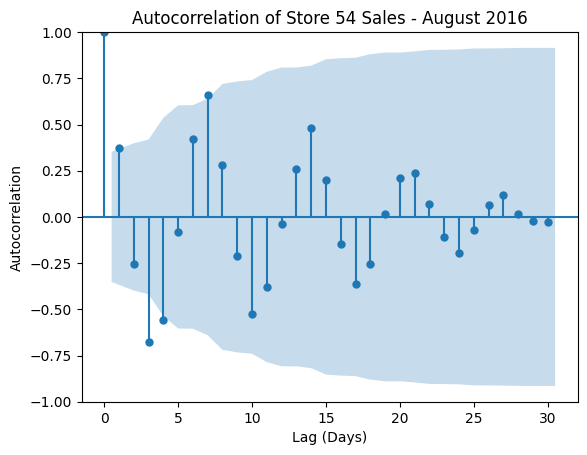

<Figure size 1500x100 with 0 Axes>

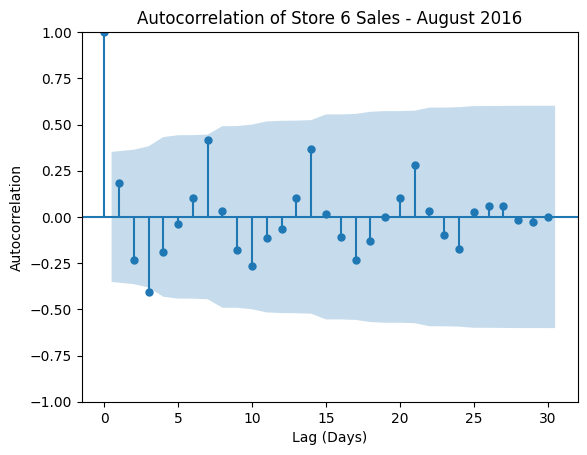

<Figure size 1500x100 with 0 Axes>

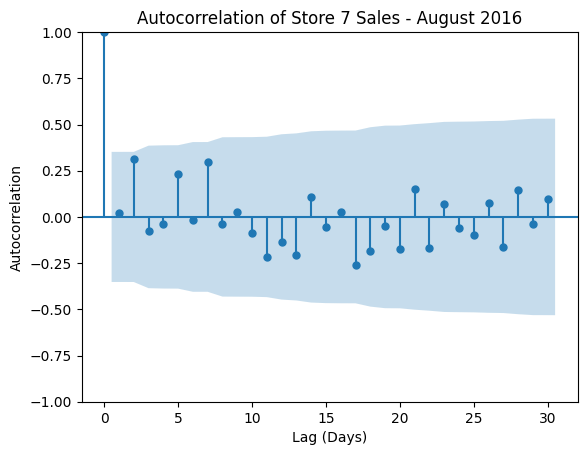

<Figure size 1500x100 with 0 Axes>

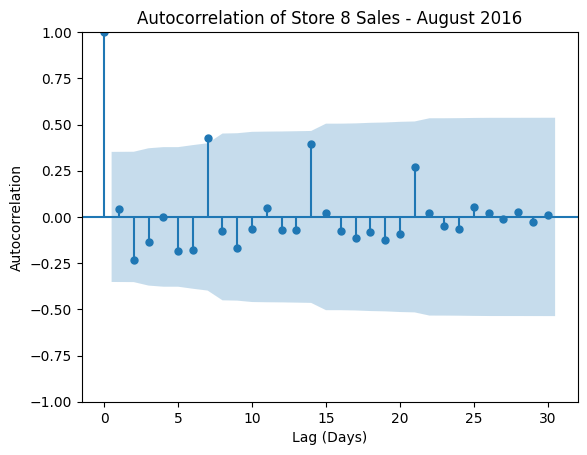

<Figure size 1500x100 with 0 Axes>

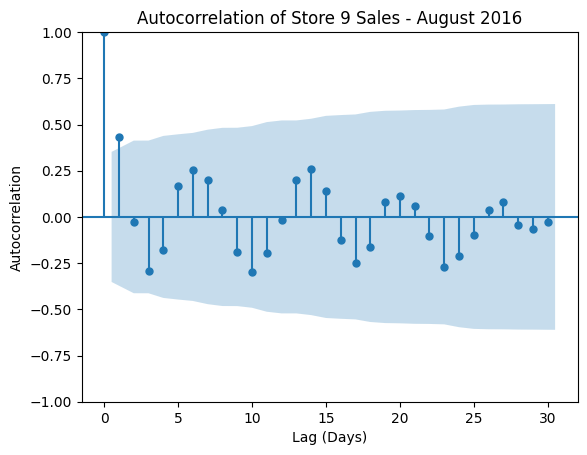

In [18]:
for store in stores:
    tmp_aug = august_sale[august_sale['store_nbr']==store][['date','agg_sales']].drop_duplicates()
    # Plot the autocorrelation using statsmodels
    plt.figure(figsize=(15, 1))
    plot_acf(tmp_aug['agg_sales'], lags=30, alpha=0.05)  # Adjust lags as needed
    plt.title(f'Autocorrelation of Store {store} Sales - August 2016')
    plt.xlabel('Lag (Days)')
    plt.ylabel('Autocorrelation')
    plt.show()    